In [9]:
import glob
import h5py
import matplotlib.pyplot as plt
import numpy as np

def get_compressed_chunk_sizes(file: str, variable: str = 'Tair') -> list:
    compressed_chunk_sizes_mb = []
    with h5py.File(file, "r") as f:
        dset = f[variable]
        chunk_data = {
            'chunk_shape': dset.chunks,
            'compression': dset.compression,
            'compression_options': dset.compression_opts,
            'number_of_chunks': dset.id.get_num_chunks(),
        }
    
        for i in range(dset.id.get_num_chunks()):
            chunk_info = dset.id.get_chunk_info(i)
            compressed_chunk_sizes_mb.append(chunk_info.size/1024/1024)
    median_compressed_size = round(np.median(compressed_chunk_sizes_mb), 3)
    chunk_data['median_compressed_chunk_size'] = f"{median_compressed_size} mb"
    uncompressed_chunk_size = round(np.prod(dset.chunks)*4/1024/1024, 3)
    chunk_data['uncompressed_chunk_size'] = f"{uncompressed_chunk_size} mb"
    chunk_data['ratio_uncompressed_median_compressed'] = f"{round(uncompressed_chunk_size/median_compressed_size, 3)} mb"
    return chunk_data, compressed_chunk_sizes_mb        

In [10]:
def plot_chunksizes(chunk_sizes: list[float]):
    plt.clf()
    plt.hist(chunk_sizes, bins=10, edgecolor='black')
    plt.xlabel('Compressed chunk size (mb)')
    plt.ylabel('Frequency')
    plt.title('Compressed chunk size (mb)')
    return plt.show()

In [11]:
files = glob.glob('../01_rechunk/*.nc')
len(files)

12

filename: ../01_rechunk/time1_lat250_lon450_Tair.nc
{'chunk_shape': (1, 250, 450), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 16224, 'median_compressed_chunk_size': '0.018 mb', 'uncompressed_chunk_size': '0.429 mb', 'ratio_uncompressed_median_compressed': '23.833 mb'}


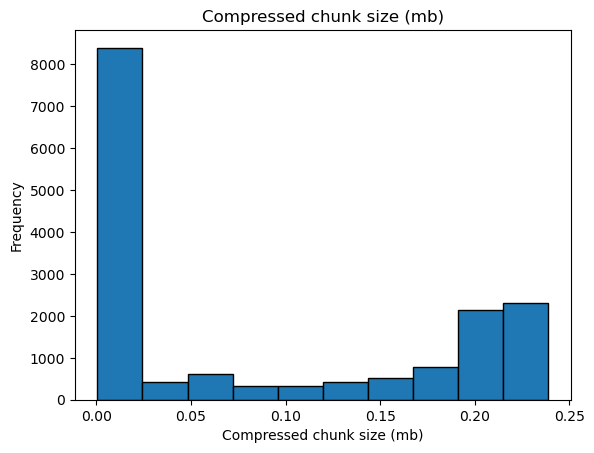

filename: ../01_rechunk/time1_lat2500_lon4500_Tair.nc
{'chunk_shape': (1, 2500, 4500), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 216, 'median_compressed_chunk_size': '5.886 mb', 'uncompressed_chunk_size': '42.915 mb', 'ratio_uncompressed_median_compressed': '7.291 mb'}


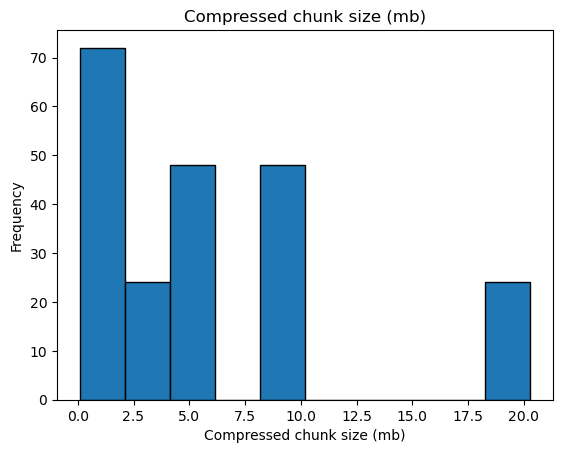

filename: ../01_rechunk/time1_lat500_lon900_Tair.nc
{'chunk_shape': (1, 500, 900), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 4056, 'median_compressed_chunk_size': '0.238 mb', 'uncompressed_chunk_size': '1.717 mb', 'ratio_uncompressed_median_compressed': '7.214 mb'}


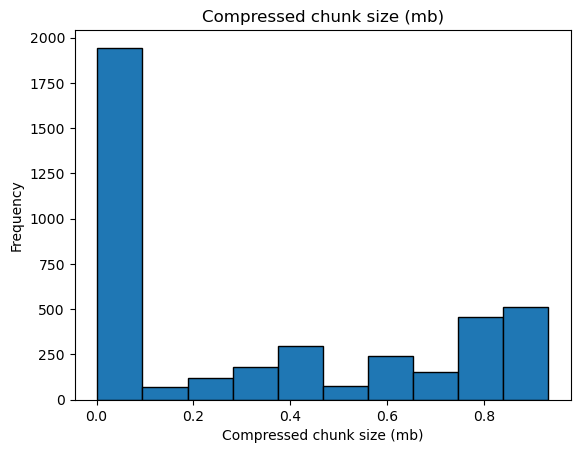

filename: ../01_rechunk/time1_lat5000_lon9000_Tair.nc
{'chunk_shape': (1, 5000, 9000), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 96, 'median_compressed_chunk_size': '13.342 mb', 'uncompressed_chunk_size': '171.661 mb', 'ratio_uncompressed_median_compressed': '12.866 mb'}


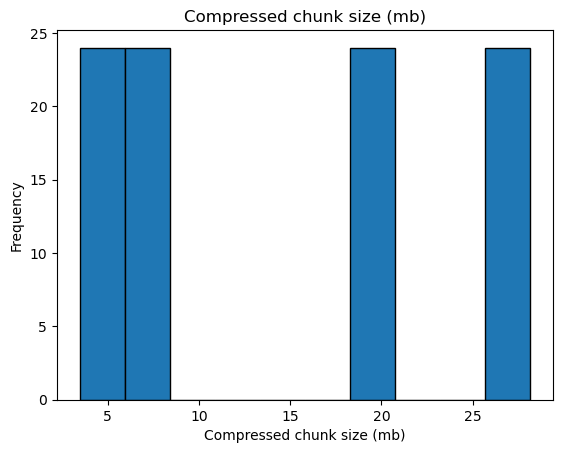

filename: ../01_rechunk/time24_lat100_lon180_Tair.nc
{'chunk_shape': (24, 100, 180), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 4225, 'median_compressed_chunk_size': '0.002 mb', 'uncompressed_chunk_size': '1.648 mb', 'ratio_uncompressed_median_compressed': '824.0 mb'}


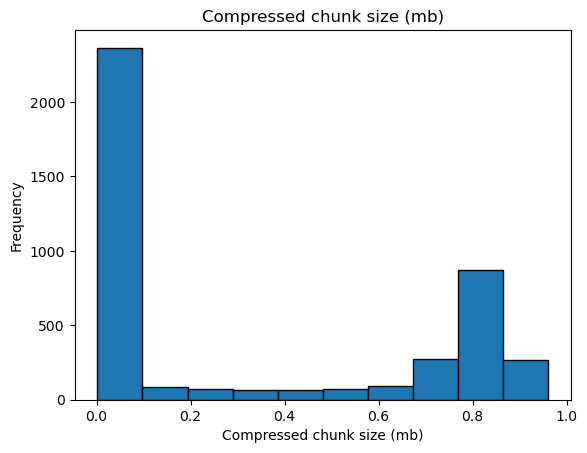

filename: ../01_rechunk/time24_lat1000_lon1800_Tair.nc
{'chunk_shape': (24, 1000, 1800), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 49, 'median_compressed_chunk_size': '22.032 mb', 'uncompressed_chunk_size': '164.795 mb', 'ratio_uncompressed_median_compressed': '7.48 mb'}


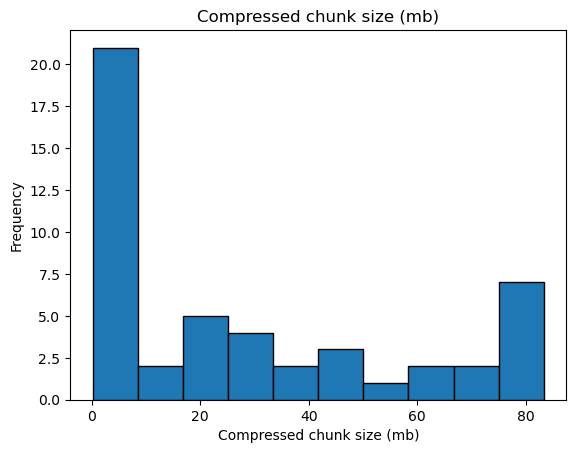

filename: ../01_rechunk/time24_lat50_lon90_Tair.nc
{'chunk_shape': (24, 50, 90), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 16157, 'median_compressed_chunk_size': '0.0 mb', 'uncompressed_chunk_size': '0.412 mb', 'ratio_uncompressed_median_compressed': 'inf mb'}


/tmp/ipykernel_1035/1900473899.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  chunk_data['ratio_uncompressed_median_compressed'] = f"{round(uncompressed_chunk_size/median_compressed_size, 3)} mb"


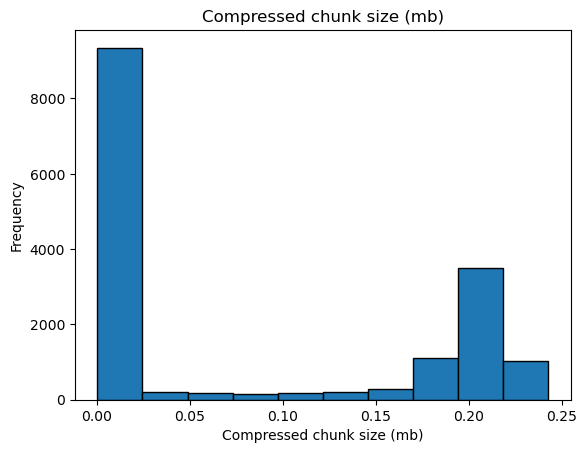

filename: ../01_rechunk/time24_lat500_lon900_Tair.nc
{'chunk_shape': (24, 500, 900), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 169, 'median_compressed_chunk_size': '5.651 mb', 'uncompressed_chunk_size': '41.199 mb', 'ratio_uncompressed_median_compressed': '7.291 mb'}


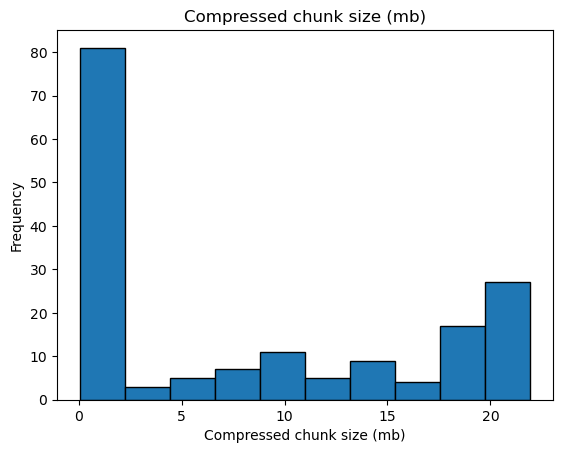

filename: ../01_rechunk/time6_lat100_lon180_Tair.nc
{'chunk_shape': (6, 100, 180), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 16900, 'median_compressed_chunk_size': '0.0 mb', 'uncompressed_chunk_size': '0.412 mb', 'ratio_uncompressed_median_compressed': 'inf mb'}


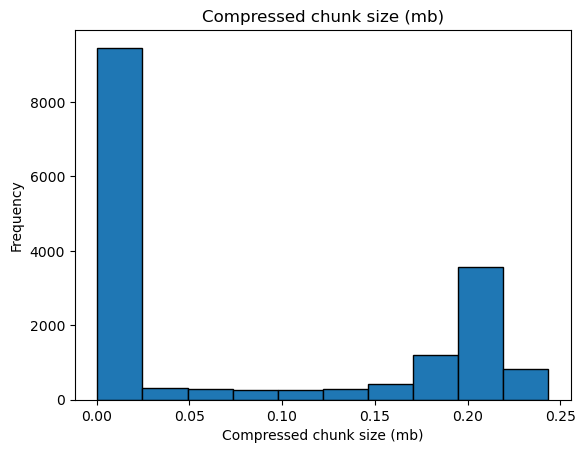

filename: ../01_rechunk/time6_lat1000_lon1800_Tair.nc
{'chunk_shape': (6, 1000, 1800), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 196, 'median_compressed_chunk_size': '5.519 mb', 'uncompressed_chunk_size': '41.199 mb', 'ratio_uncompressed_median_compressed': '7.465 mb'}


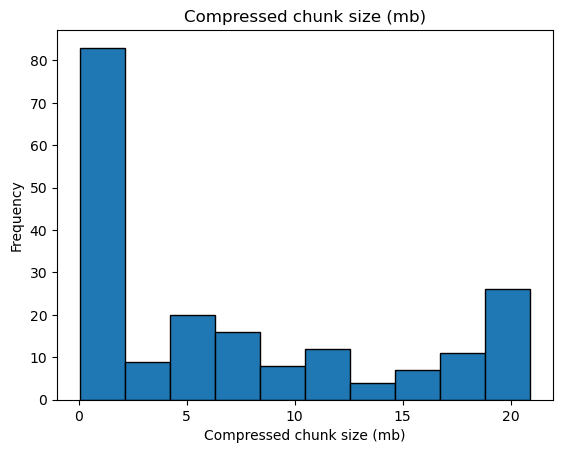

filename: ../01_rechunk/time6_lat200_lon360_Tair.nc
{'chunk_shape': (6, 200, 360), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 4356, 'median_compressed_chunk_size': '0.026 mb', 'uncompressed_chunk_size': '1.648 mb', 'ratio_uncompressed_median_compressed': '63.385 mb'}


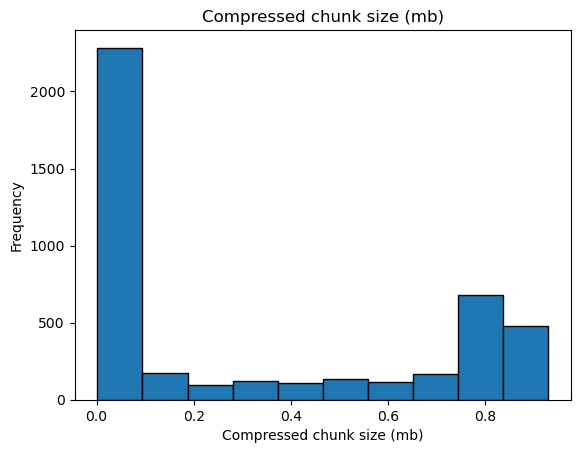

filename: ../01_rechunk/time6_lat2000_lon3600_Tair.nc
{'chunk_shape': (6, 2000, 3600), 'compression': 'gzip', 'compression_options': 4, 'number_of_chunks': 64, 'median_compressed_chunk_size': '12.622 mb', 'uncompressed_chunk_size': '164.795 mb', 'ratio_uncompressed_median_compressed': '13.056 mb'}


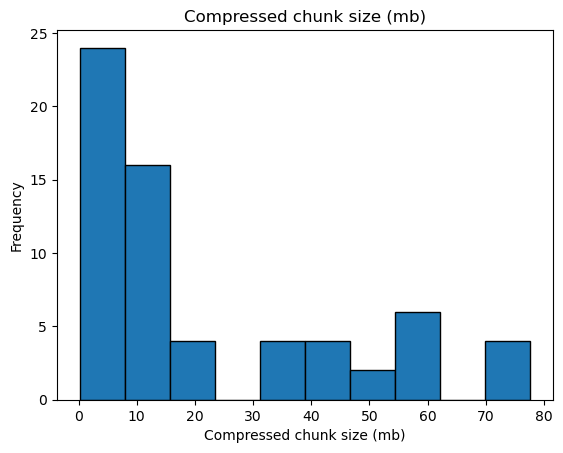

In [12]:
for file in files:
    print(f"filename: {file}")
    chunk_data, chunk_sizes = get_compressed_chunk_sizes(file)
    print(chunk_data)
    plot_chunksizes(chunk_sizes)